# First import the necessary library

In [1]:
from onset_functions import *
import onset_widgets as w

# Choose the spacecraft, sensor, view direction and particle species:

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'SOHO'), value='STEREO-A…

Dropdown(description='Sensor:', options=('SEPT', 'HET'), value='SEPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('protons', 'electrons'), value='protons')

# Set the path to your data folder:

In [3]:
# Path for the downloaded data (by default the current directory)
data_path = f"{os.getcwd()}"

# Choose time range for data loading, and create the Event object:

In [13]:
# Format of date: year, month, day
startdate = datetime.date(2021, 10, 9)
enddate = datetime.date(2021, 10, 10)

# Get event data:
Event_onset = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value,
                    start_date=startdate, end_date=enddate, 
                    data_path=data_path)

# Set the averaging period, background_range, channels to plot and the time range of the plot:

In [18]:
# Use pandas-compatible resampling period string, e.g. '10min' or '30s'
# Leave to None to not resample data
averaging = "2min"

# Set the time range for what is considered the background preceding the event:
# Format of datetime: year, month, day, hour, minute, second
background_range = (datetime.datetime(2021, 10, 9, 2, 0, 0), 
                    datetime.datetime(2021, 10, 9, 6, 0, 0))

# Set the channel(s) to plot (use a list to combine multiple channels):
channels = [2,3,4]

# Set the time range for the plot:
plot_range = [datetime.datetime(2021, 10, 9, 0),datetime.datetime(2021, 10, 9, 12)]

# Run the cell to produce a plot

##### >Energy channels< #####
45-75 keV
#############################

##### >Flux peak< #####
time
2021-10-09 07:47:00    91705.166667
Freq: 2T, dtype: float64
#######################

##### >Onset time< #####
2021-10-09 06:49:00
########################

##### >Mean of background intensity< #####
15.672339722222224
##########################################

##### >Std of background intensity< #####
8.078878677877679
#########################################

##### >Particle species< #####
electrons
##############################



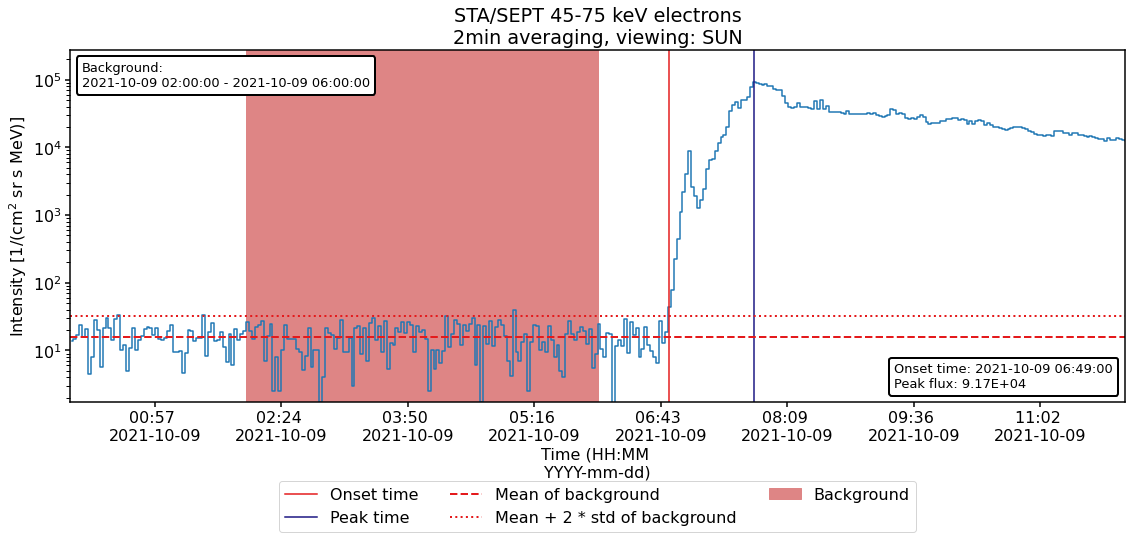

In [19]:
flux, onset_stats, onset_found, peak_flux, peak_time, fig, bg_mean = Event_onset.analyse(viewing=w.view_drop.value, background_range=background_range, channels=channels,
                                                                                         resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range)
onset = onset_stats[-1]
peak_flux = peak_flux.values[0]
output = event_onset.output

In [ ]:
# TODO! Raise a warning if background range is separated from the plot_range / data. Warning, not an error.

# output is a dictionary, that contains 'flux_series', 'onset_stats', 'onset_found', 'onset', 'peak_flux', 'peak_time', 'fig' and 'bg_mean'

In [10]:
print(f"Onset: {output['onset']}")
print(f"Peak flux: {output['peak_flux']:.2e}")
print(f"Peak time: {output['peak_time']:}")
print(f"Bg mean: {output['bg_mean']:.2e}")

Onset: 2021-10-09 06:50:58.041590528
Peak flux: 1.30e+05
Peak time: 2021-10-09 07:47:58.012780800
Bg mean: 2.45e+01


# Saving figures

In [20]:
# Path to save the plots
plot_path = f'{os.getcwd()}'

# Date of the event as an integer YYYYMMDD (used for generating the default figure name)
event_date = 20210720

# Use a pre-generated name for the file:
file_name = f"{plot_path}{os.sep}{w.spacecraft_drop.value}_{w.sensor_drop.value}_{w.species_drop.value}_{event_date}_{averaging}.png"

# Or type your own here:
# file_name = ""

In [21]:
# Check that the name is correct
print(file_name)

/home/chospa/Documents/Github/SPOT/STEREO-A_SEPT_electrons_20210720_None.png


In [23]:
# Save plot
fig.savefig(file_name, facecolor= 'white', transparent=False)